In [1]:
import glob
import uproot

import h5py
from dataclasses import dataclass

import numpy as np

import matplotlib.pyplot as plt

In [2]:
stored_data_path = "./mc20_truth.h5"
raw_data_path    = "/root/data/qe-stkorn-v2/*/*.root"
nTuple_dir_list = glob.glob(raw_data_path)
print(nTuple_dir_list)
# debug
with uproot.open(nTuple_dir_list[0], mode="r") as file:
    print(file["truth;1"].keys())

['/root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root', '/root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root', '/root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_output/user.stkorn.42053499._000001.output.root']
['MC_Hdecay1_decay1_afterFSR_CAR_eta', 'MC_Hdecay1_decay1_afterFSR_CAR_m', 'MC_Hdecay1_decay1_afterFSR_CAR_pdgId', 'MC_Hdecay1_decay1_afterFSR_CAR_phi', 'MC_Hdecay1_decay1_afterFSR_CAR_pt', 'MC_Hdecay1_decay1_beforeFSR_CAR_eta', 'MC_Hdecay1_decay1_beforeFSR_CAR_m', 'MC_Hdecay1_decay1_beforeFSR_CAR_pdgId', 'MC_Hdecay1_decay1_beforeFSR_CAR_phi', 'MC_Hdecay1_decay1_beforeFSR_CAR_pt', 'MC_Hdecay1_decay2_afterFSR_CAR_eta', 'MC_Hdecay1_decay2_afterFSR_CAR_m', 'MC_Hdecay1_decay2_afterFSR_CAR_pdgId', 'MC_Hdecay1_decay2_after

In [3]:
def process_ntuple_files(nTuple_dir_list, branches, data_mode="truth"):
    accumulated_results = {branch: [] for branch in branches}

    for nTuple_file in nTuple_dir_list:
        with uproot.open(nTuple_file, mode="r") as file:
            data = file[data_mode + ";1"].arrays(branches, library="np")

        for branch in branches:
            accumulated_results[branch].append(data[branch])

    results = []
    for branch in branches:
        concatenated = np.concatenate(accumulated_results[branch])
        results.append((branch, concatenated))
    return dict(results)

In [4]:
# truth branches (mixing polarizing)

branches = [
    'HWW_MC_Hdecay1_decay1_afterFSR_pt',
    'HWW_MC_Hdecay1_decay1_afterFSR_eta',
    'HWW_MC_Hdecay1_decay1_afterFSR_phi',
    'HWW_MC_Hdecay1_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay1_decay2_afterFSR_pt',
    'HWW_MC_Hdecay1_decay2_afterFSR_eta',
    'HWW_MC_Hdecay1_decay2_afterFSR_phi',
    'HWW_MC_Hdecay1_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay1_afterFSR_pt',
    'HWW_MC_Hdecay2_decay1_afterFSR_eta',
    'HWW_MC_Hdecay2_decay1_afterFSR_phi',
    'HWW_MC_Hdecay2_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay2_afterFSR_pt',
    'HWW_MC_Hdecay2_decay2_afterFSR_eta',
    'HWW_MC_Hdecay2_decay2_afterFSR_phi',
    'HWW_MC_Hdecay2_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay1_afterFSR_pt',
    'HWW_MC_Hdecay1_afterFSR_eta',
    'HWW_MC_Hdecay1_afterFSR_phi',
    'HWW_MC_Hdecay1_afterFSR_m',
    'HWW_MC_Hdecay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_afterFSR_pt',
    'HWW_MC_Hdecay2_afterFSR_eta',
    'HWW_MC_Hdecay2_afterFSR_phi',
    'HWW_MC_Hdecay2_afterFSR_m',
    'HWW_MC_Hdecay2_afterFSR_pdgId',
    'HWW_MC_H_afterFSR_pt',
    'HWW_MC_H_afterFSR_eta',
    'HWW_MC_H_afterFSR_phi',
    'HWW_MC_H_afterFSR_m',
    'HWW_MC_H_afterFSR_pdgId',
    'eventNumber',
]

truth_mixing_data = process_ntuple_files(nTuple_dir_list, branches)

# extract variables from accumulated results
(
    truth_lnu11_pt, truth_lnu11_eta, truth_lnu11_phi, truth_lnu11_id,
    truth_lnu12_pt, truth_lnu12_eta, truth_lnu12_phi, truth_lnu12_id,
    truth_lnu21_pt, truth_lnu21_eta, truth_lnu21_phi, truth_lnu21_id,
    truth_lnu22_pt, truth_lnu22_eta, truth_lnu22_phi, truth_lnu22_id,
    truth_w1_pt, truth_w1_eta, truth_w1_phi, truth_w1_m, truth_w1_id,
    truth_w2_pt, truth_w2_eta, truth_w2_phi, truth_w2_m, truth_w2_id,
    truth_higgs_pt, truth_higgs_eta, truth_higgs_phi, truth_higgs_m, truth_higgs_id,
    truth_eventNumber,
) = [truth_mixing_data[branch] for branch in branches]
print('Truth sample length:', len(truth_higgs_pt))

Truth sample length: 7311000


In [5]:
# truth branches (only longitudinal polarzing) --> leptons are  modified by CAR alg

branches = [
    'MC_Hdecay1_decay1_afterFSR_CAR_pt',
    'MC_Hdecay1_decay1_afterFSR_CAR_eta',
    'MC_Hdecay1_decay1_afterFSR_CAR_phi',
    'MC_Hdecay1_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay1_decay2_afterFSR_CAR_pt',
    'MC_Hdecay1_decay2_afterFSR_CAR_eta',
    'MC_Hdecay1_decay2_afterFSR_CAR_phi',
    'MC_Hdecay1_decay2_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay1_afterFSR_CAR_pt',
    'MC_Hdecay2_decay1_afterFSR_CAR_eta',
    'MC_Hdecay2_decay1_afterFSR_CAR_phi',
    'MC_Hdecay2_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay2_afterFSR_CAR_pt',
    'MC_Hdecay2_decay2_afterFSR_CAR_eta',
    'MC_Hdecay2_decay2_afterFSR_CAR_phi',
    'MC_Hdecay2_decay2_afterFSR_CAR_pdgId',
]

truth_only_data = process_ntuple_files(nTuple_dir_list, branches)

(
    truth_lnu11_car_pt, truth_lnu11_car_eta, truth_lnu11_car_phi, truth_lnu11_car_id,
    truth_lnu12_car_pt, truth_lnu12_car_eta, truth_lnu12_car_phi, truth_lnu12_car_id,
    truth_lnu21_car_pt, truth_lnu21_car_eta, truth_lnu21_car_phi, truth_lnu21_car_id,
    truth_lnu22_car_pt, truth_lnu22_car_eta, truth_lnu22_car_phi, truth_lnu22_car_id,
) = [truth_only_data[branch] for branch in branches]
print('Truth CAR sample length:', len(truth_lnu11_car_pt))

Truth CAR sample length: 7311000


3282435
7311000


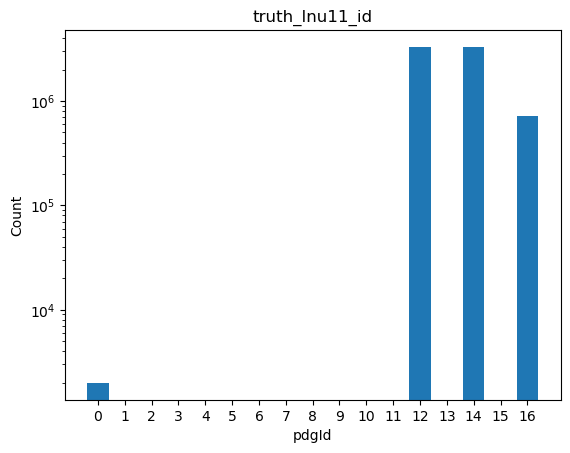

3282435
7311000


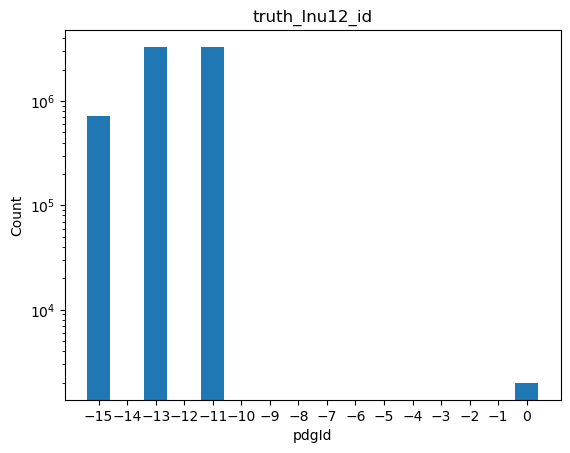

3302340
7311000


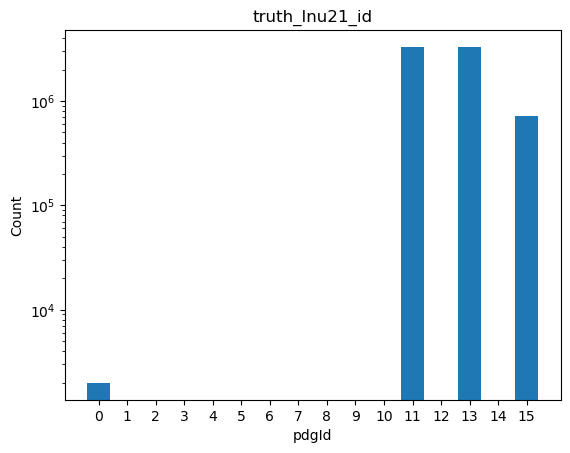

3302340
7311000


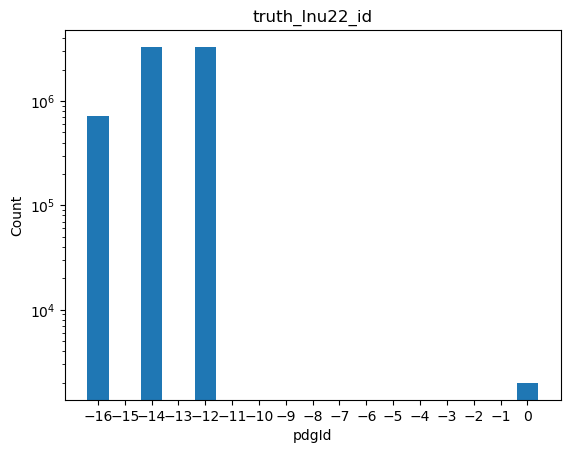

7309015
7311000


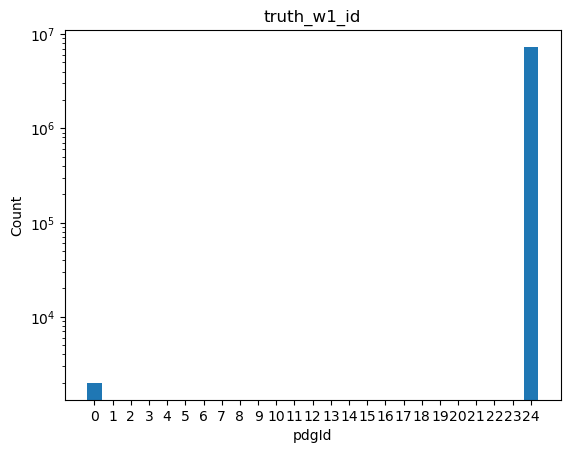

7309015
7311000


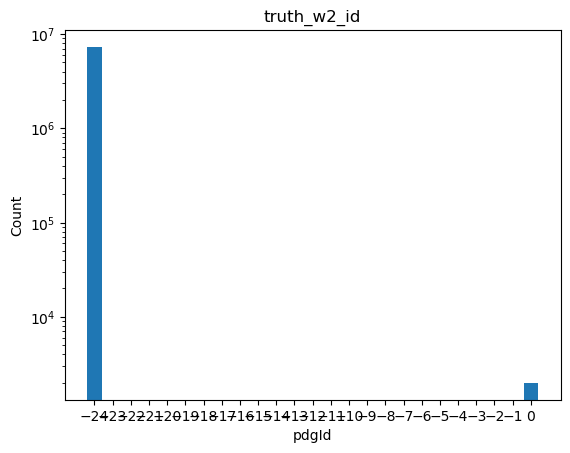

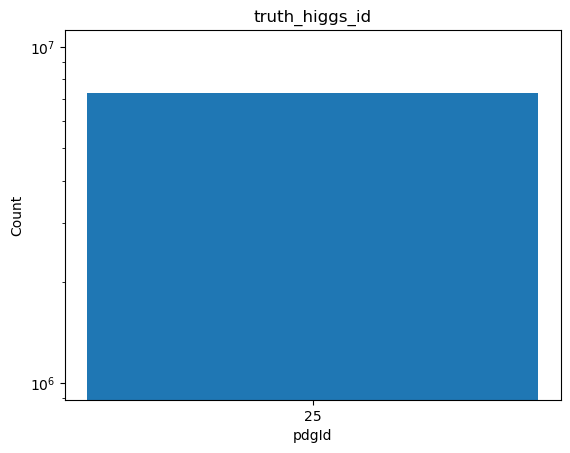

In [6]:
# visualize zero padding 

print(np.sum(truth_lnu11_id==12))
print(len(truth_lnu11_id))
unique_ids, counts = np.unique(truth_lnu11_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu11_id")
plt.show()

print(np.sum(truth_lnu12_id==-11))
print(len(truth_lnu12_id))
unique_ids, counts = np.unique(truth_lnu12_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu12_id")
plt.show()

print(np.sum(truth_lnu21_id==13))
print(len(truth_lnu21_id))
unique_ids, counts = np.unique(truth_lnu21_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu21_id")
plt.show()

print(np.sum(truth_lnu22_id==-14))
print(len(truth_lnu22_id))
unique_ids, counts = np.unique(truth_lnu22_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_lnu22_id")
plt.show()

print(np.sum(truth_w1_id==24))
print(len(truth_w1_id))
unique_ids, counts = np.unique(truth_w1_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_w1_id")
plt.show()

print(np.sum(truth_w2_id==-24))
print(len(truth_w2_id))
unique_ids, counts = np.unique(truth_w2_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_w2_id")
plt.show()

unique_ids, counts = np.unique(truth_higgs_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdgId")
plt.ylabel("Count")
plt.title("truth_higgs_id")
plt.show()

In [7]:
def is_valid(part1, part2, part11, part12, part21, part22):
    '''
    :param part1 : pdgId of the Hdecay1 --> W+
    :param part2 : pdgId of the Hdecay2 --> W-
    :param part11: pdgId of the particle 1 from Hdecay1 --> neutrino
    :param part12: pdgId of the particle 2 from Hdecay1 --> lepton
    :param part21: pdgId of the particle 1 from Hdecay2 --> lepton
    :param part22: pdgId of the particle 2 from Hdecay2 --> neutrino
    
    :return: boolean array of valid H->WW*->lvlv events
    '''
    print("Initial:", len(part1))
    cond1 = (part11 * part12 == -11*12) | (part11 * part12 == -13*14)  # pairing correct l and nu for part1
    print("Remain :", cond1.sum())
    cond2 = (part21 * part22 == -11*12) | (part21 * part22 == -13*14)  # pairing correct l and nu for part2
    print("Remain :", cond2.sum())
    cond3 = part12 * part21 == -11*13  # pairing diff flav leps and conserving charge (e, mu only)
    print("Remain :", cond3.sum())
    cond4 = part1 == 24   # confirm W+ boson (excluding zero paddings)
    print("Remain :", cond4.sum())
    cond5 = part2 == -24  # confirm W- boson (excluding zero paddings)
    print("Remain :", cond5.sum())
    # higgs has already been checked to be the correct particle ID form previous plots
    print("")
    return cond1 & cond2 & cond3 & cond4 & cond5

valid_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_id, truth_lnu12_id, truth_lnu21_id, truth_lnu22_id)
valid_car_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_car_id, truth_lnu12_car_id, truth_lnu21_car_id, truth_lnu22_car_id)
print(1*(valid_ind).sum())
print("Check CAR results:", np.all(valid_ind == valid_car_ind))

print("Double check the valid indices...", "before", len(truth_w1_id), "after", len(truth_w1_id[valid_ind]))
print("Ratio of double checking:", len(truth_w1_id[valid_ind]) / len(truth_w1_id))

Initial: 7311000
Remain : 6587332
Remain : 6587342
Remain : 2963488
Remain : 7309015
Remain : 7309015

Initial: 7311000
Remain : 6587332
Remain : 6587342
Remain : 2963488
Remain : 7309015
Remain : 7309015

2963488
Check CAR results: True
Double check the valid indices... before 7311000 after 2963488
Ratio of double checking: 0.40534646423197923


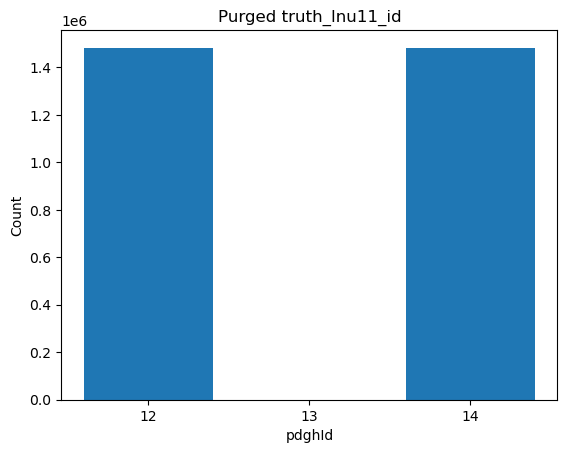

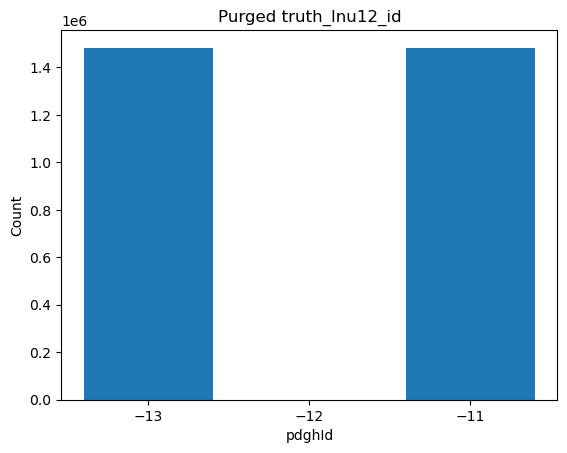

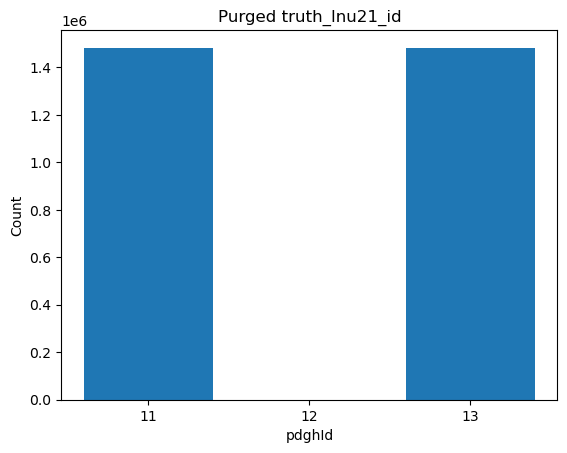

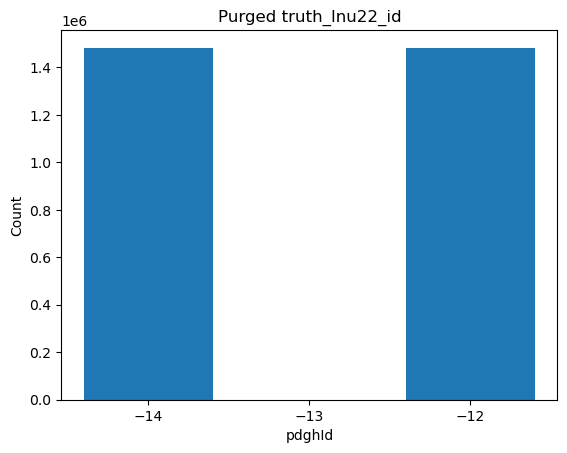

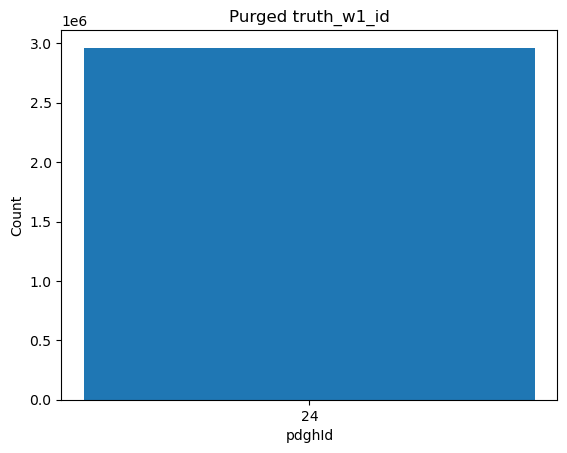

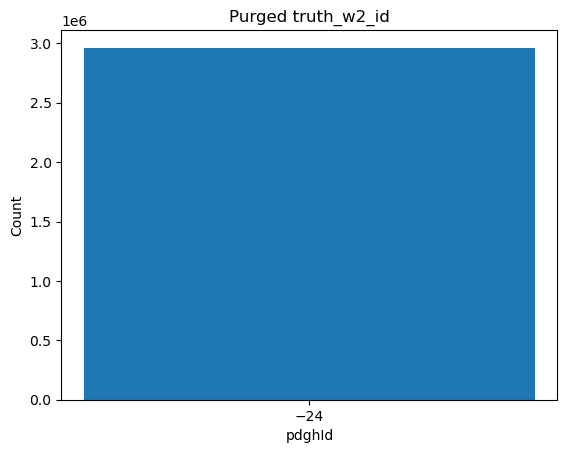

Two w boson need to have same length... (before double checking) True
Two w boson need to have same length... True


In [8]:
unique_ids, counts = np.unique(truth_lnu11_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_lnu11_id")
plt.show()

unique_ids, counts = np.unique(truth_lnu12_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_lnu12_id")
plt.show()

unique_ids, counts = np.unique(truth_lnu21_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_lnu21_id")
plt.show()

unique_ids, counts = np.unique(truth_lnu22_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_lnu22_id")
plt.show()

unique_ids, counts = np.unique(truth_w1_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_w1_id")
plt.show()

unique_ids, counts = np.unique(truth_w2_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
# plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max() + 1, 1))
plt.xlabel("pdghId")
plt.ylabel("Count")
plt.title("Purged truth_w2_id")
plt.show()

print(
    "Two w boson need to have same length... (before double checking)",
    np.all(len(truth_w1_id == len(truth_w2_id))),
)
print(
    "Two w boson need to have same length...",
    np.all(len(truth_w1_id[valid_ind] == len(truth_w2_id[valid_ind]))),
)

In [9]:
def test_plot(data, title, xlabel="[MeV]", ylabel="Count"):
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=np.linspace(data.min(), data.max(), 101))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    plt.close()

In [10]:
GEV = 1e-3

def px(pt, phi):
    return pt * np.cos(phi)

def py(pt, phi):
    return pt * np.sin(phi)

def pz(pt, eta):
    return pt * np.sinh(eta)

def energy(pt, eta, m):
    return np.sqrt(np.square(pt) + np.square(pz(pt, eta)) + np.square(m))

def pt(px, py):
    return np.sqrt(np.square(px) + np.square(py))

def eta(px, py, pz):
    pt = np.sqrt(np.square(px) + np.square(py))
    return np.arcsinh(np.divide(pz, pt))

def phi(px, py):
    return np.arctan2(py, px)

def deta(eta1, eta2):
    return np.abs(eta1 - eta2)

def dphi_pi(phi1, phi2):
    phi_diff = phi1 - phi2
    phi_diff = np.where(phi_diff < 0.0, -phi_diff, phi_diff)
    phi_diff = np.where(phi_diff > 2.0 * np.pi, phi_diff - 2.0 * np.pi, phi_diff)
    phi_diff = np.where(phi_diff >= np.pi, 2.0 * np.pi - phi_diff, phi_diff)
    return np.divide(phi_diff, np.pi)

def m(p4):
    return np.sqrt(
        np.square(p4[:, 3])
        - np.square(p4[:, 0])
        - np.square(p4[:, 1])
        - np.square(p4[:, 2])
    )

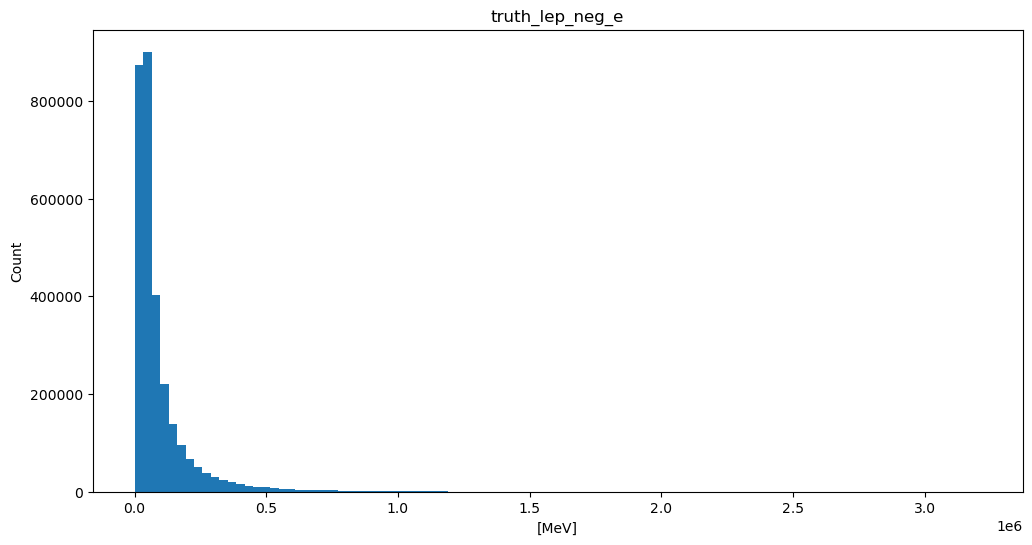

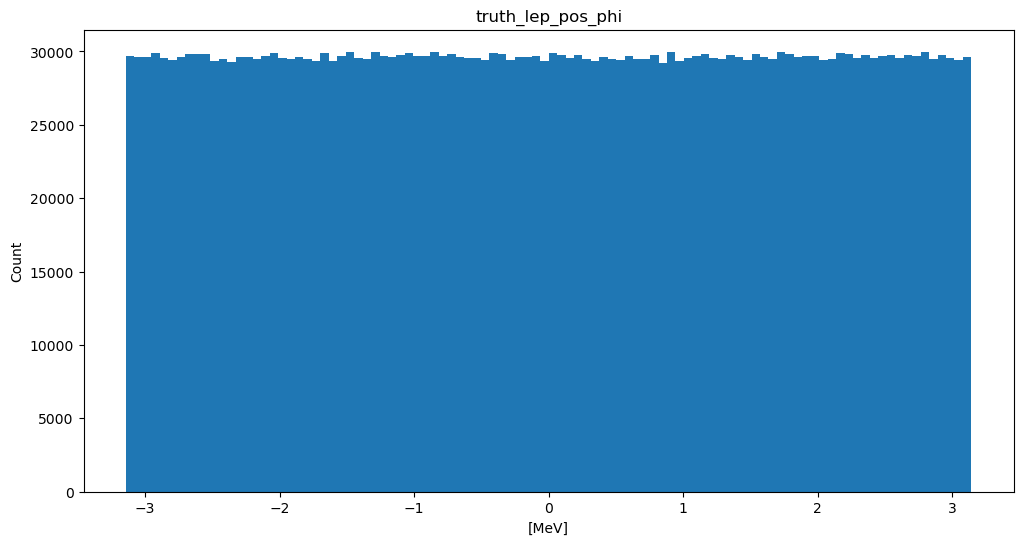

In [11]:
# truth lep

truth_nu_pos_pt  = truth_lnu11_pt[valid_ind]
truth_lep_neg_pt = truth_lnu12_pt[valid_ind]
truth_lep_pos_pt = truth_lnu21_pt[valid_ind]
truth_nu_neg_pt  = truth_lnu22_pt[valid_ind]
# test_plot(truth_nu_pos_pt, 'truth_nu_pos_pt')
# test_plot(truth_lep_neg_pt, 'truth_lep_neg_pt')

truth_nu_pos_eta  = truth_lnu11_eta[valid_ind]
truth_lep_neg_eta = truth_lnu12_eta[valid_ind]
truth_lep_pos_eta = truth_lnu21_eta[valid_ind]
truth_nu_neg_eta  = truth_lnu22_eta[valid_ind]

truth_nu_pos_phi  = truth_lnu11_phi[valid_ind]
truth_lep_neg_phi = truth_lnu12_phi[valid_ind]
truth_lep_pos_phi = truth_lnu21_phi[valid_ind]
truth_nu_neg_phi  = truth_lnu22_phi[valid_ind]

truth_nu_neg_m = np.zeros(truth_nu_neg_phi.shape)
truth_nu_pos_m = np.zeros(truth_nu_pos_phi.shape)

lep_neg_m     = np.full(len(truth_nu_pos_m), -999, dtype=np.float32)
mask_electron = truth_lnu12_id[valid_ind] == -11
mask_muon     = truth_lnu12_id[valid_ind] == -13
lep_neg_m[mask_electron] = 0.000511
lep_neg_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")

lep_pos_m     = np.full(len(truth_nu_pos_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_id[valid_ind] == 11
mask_muon     = truth_lnu21_id[valid_ind] == 13
lep_pos_m[mask_electron] = 0.000511
lep_pos_m[mask_muon]     = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_pos_id is not lepton")

truth_nu_pos_px = px(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_py = py(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_pz = pz(truth_nu_pos_pt, truth_nu_pos_eta)
truth_nu_pos_e  = energy(truth_nu_pos_pt, truth_nu_pos_eta, truth_nu_pos_m)
truth_nu_neg_px = px(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_py = py(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_pz = pz(truth_nu_neg_pt, truth_nu_neg_eta)
truth_nu_neg_e  = energy(truth_nu_neg_pt, truth_nu_neg_eta, truth_nu_neg_m)
truth_lep_pos_px = px(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_py = py(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_pz = pz(truth_lep_pos_pt, truth_lep_pos_eta)
truth_lep_pos_e  = energy(truth_lep_pos_pt, truth_lep_pos_eta, lep_pos_m)
truth_lep_neg_px = px(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_py = py(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_pz = pz(truth_lep_neg_pt, truth_lep_neg_eta)
truth_lep_neg_e  = energy(truth_lep_neg_pt, truth_lep_neg_eta, lep_neg_m)
test_plot(truth_lep_neg_e, "truth_lep_neg_e")
test_plot(truth_lep_pos_phi, "truth_lep_pos_phi")

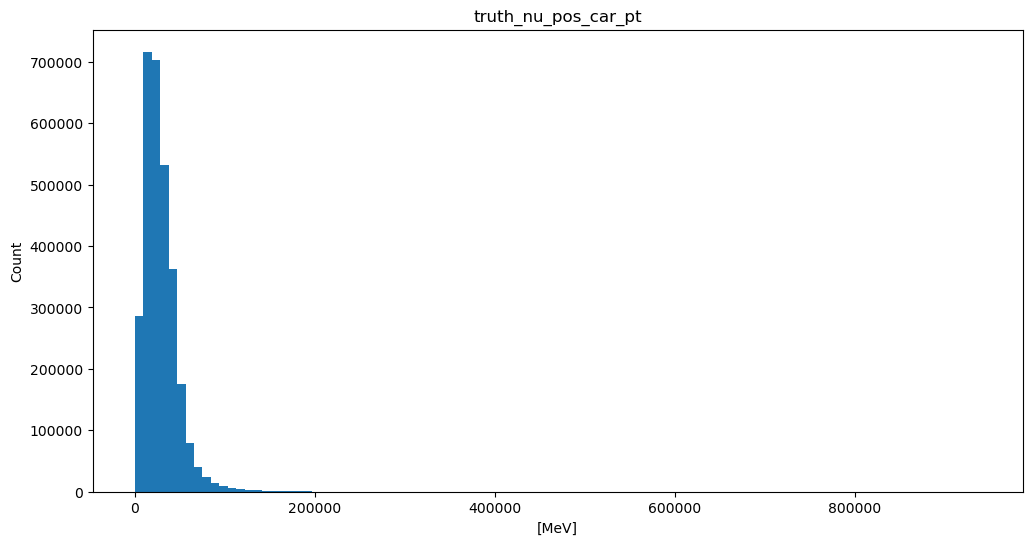

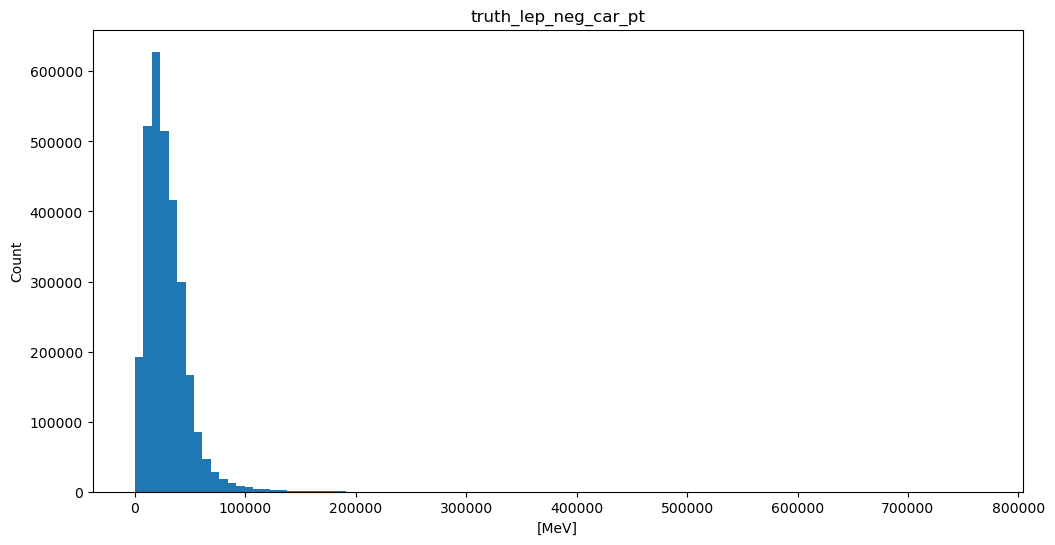

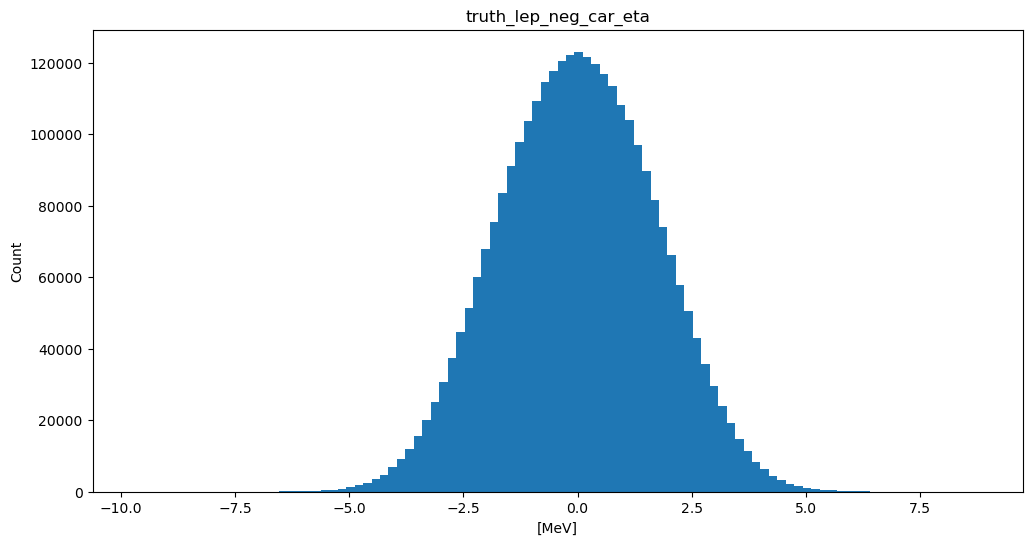

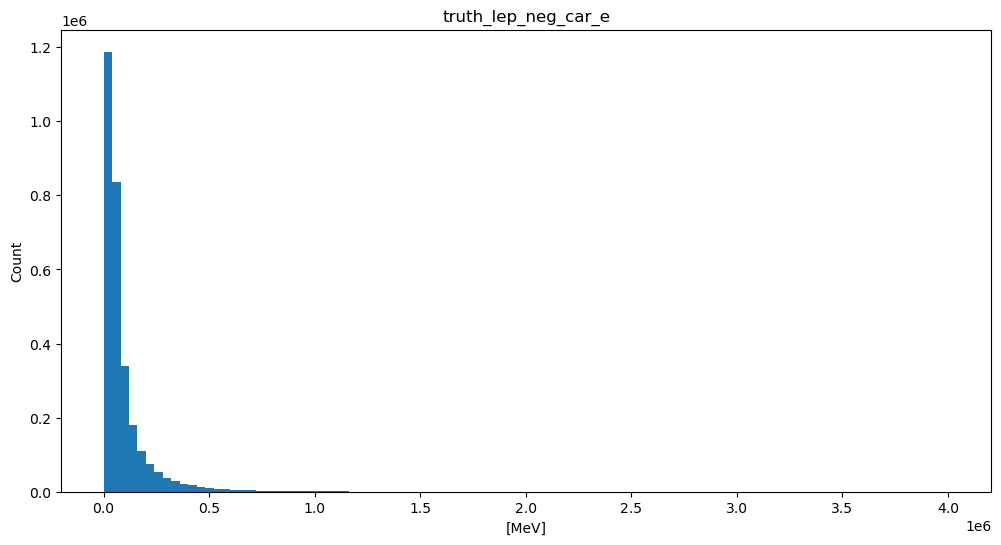

In [12]:
# truth lep (CAR)

truth_nu_pos_car_pt  = truth_lnu11_car_pt[valid_ind]
truth_lep_neg_car_pt = truth_lnu12_car_pt[valid_ind]
truth_lep_pos_car_pt = truth_lnu21_car_pt[valid_ind]
truth_nu_neg_car_pt  = truth_lnu22_car_pt[valid_ind]
test_plot(truth_nu_pos_car_pt, "truth_nu_pos_car_pt")
test_plot(truth_lep_neg_car_pt, "truth_lep_neg_car_pt")

truth_nu_pos_car_eta  = truth_lnu11_car_eta[valid_ind]
truth_lep_neg_car_eta = truth_lnu12_car_eta[valid_ind]
truth_lep_pos_car_eta = truth_lnu21_car_eta[valid_ind]
truth_nu_neg_car_eta  = truth_lnu22_car_eta[valid_ind]
test_plot(truth_lep_neg_car_eta, "truth_lep_neg_car_eta")


truth_nu_pos_car_phi  = truth_lnu11_car_phi[valid_ind]
truth_lep_neg_car_phi = truth_lnu12_car_phi[valid_ind]
truth_lep_pos_car_phi = truth_lnu21_car_phi[valid_ind]
truth_nu_neg_car_phi  = truth_lnu22_car_phi[valid_ind]

truth_nu_pos_car_m = np.zeros(truth_nu_pos_car_phi.shape)
truth_nu_neg_car_m = np.zeros(truth_nu_neg_car_phi.shape)

lep_neg_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu12_car_id[valid_ind] == -11
mask_muon     = truth_lnu12_car_id[valid_ind] == -13
lep_neg_car_m[mask_electron] = 0.000511
lep_neg_car_m[mask_muon]     = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")

lep_pos_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_car_id[valid_ind] == 11
mask_muon     = truth_lnu21_car_id[valid_ind] == 13
lep_pos_car_m[mask_electron] = 0.000511
lep_pos_car_m[mask_muon]     = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_pos_id is not lepton")

truth_nu_pos_car_px = px(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_py = py(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_pz = pz(truth_nu_pos_car_pt, truth_nu_pos_car_eta)
truth_nu_pos_car_e  = energy(
    truth_nu_pos_car_pt, truth_nu_pos_car_eta, truth_nu_pos_car_m
)
truth_nu_neg_car_px = px(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_py = py(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_pz = pz(truth_nu_neg_car_pt, truth_nu_neg_car_eta)
truth_nu_neg_car_e  = energy(
    truth_nu_neg_car_pt, truth_nu_neg_car_eta, truth_nu_neg_car_m
)
truth_lep_pos_car_px = px(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_py = py(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_pz = pz(truth_lep_pos_car_pt, truth_lep_pos_car_eta)
truth_lep_pos_car_e  = energy(truth_lep_pos_car_pt, truth_lep_pos_car_eta, lep_pos_car_m)
truth_lep_neg_car_px = px(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_py = py(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_pz = pz(truth_lep_neg_car_pt, truth_lep_neg_car_eta)
truth_lep_neg_car_e  = energy(truth_lep_neg_car_pt, truth_lep_neg_car_eta, lep_neg_car_m)
test_plot(truth_lep_neg_car_e, "truth_lep_neg_car_e")

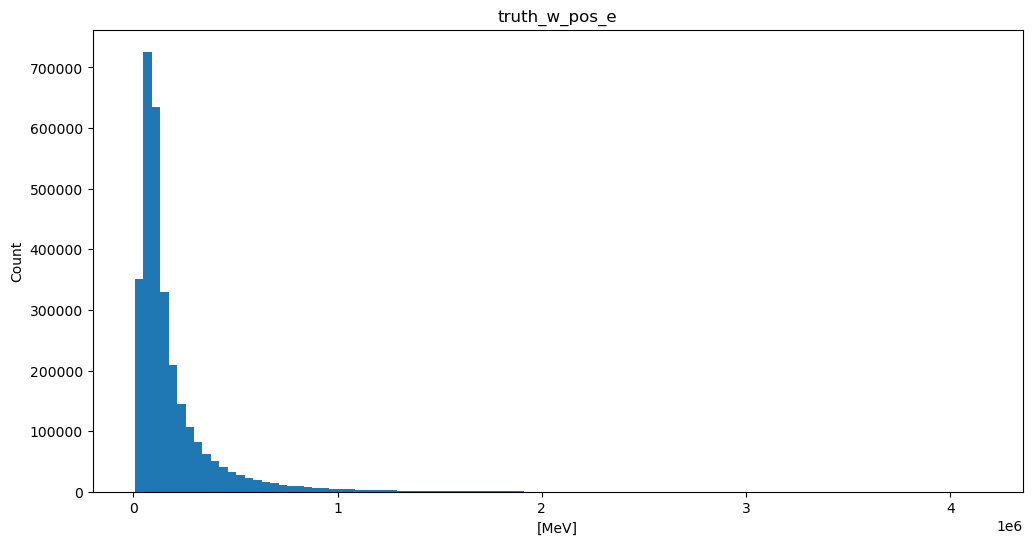

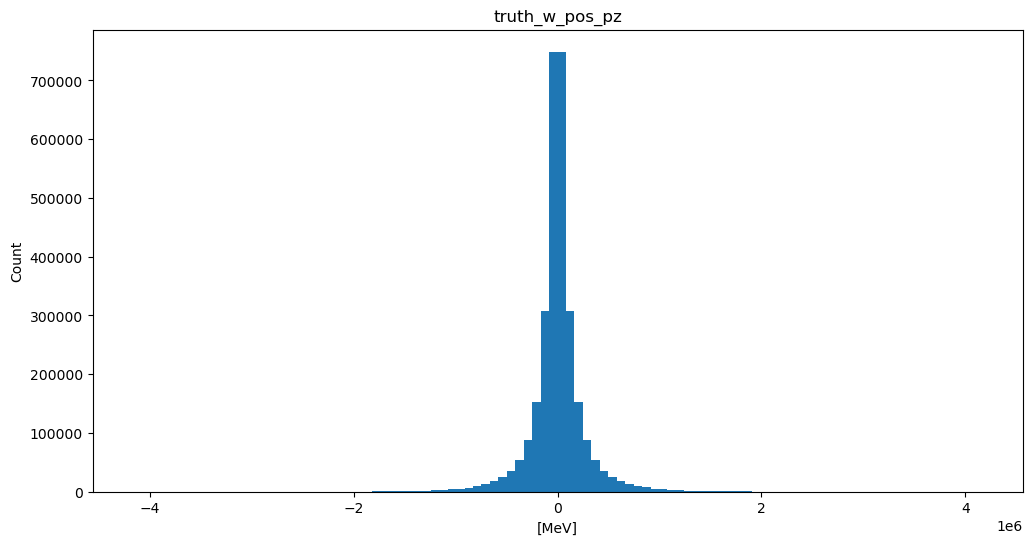

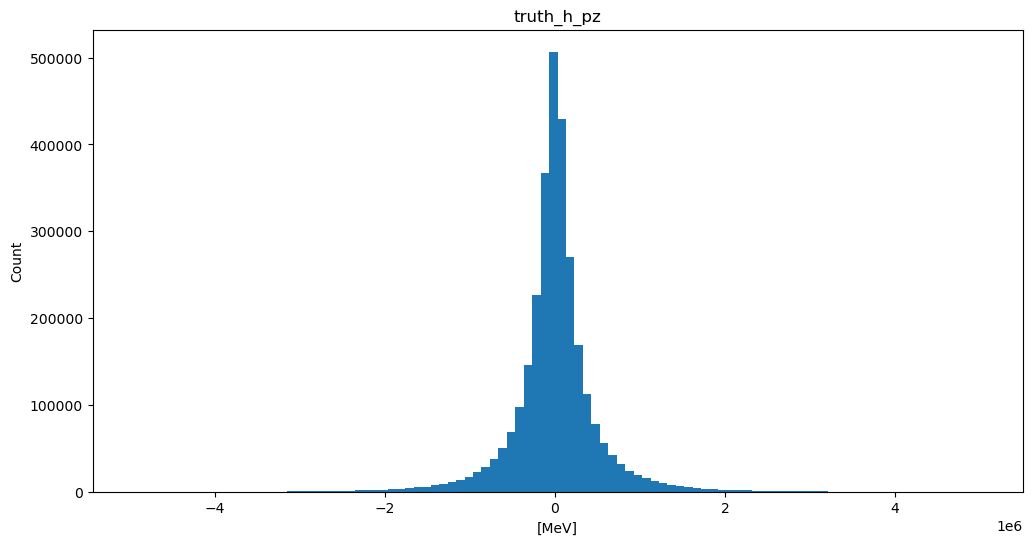

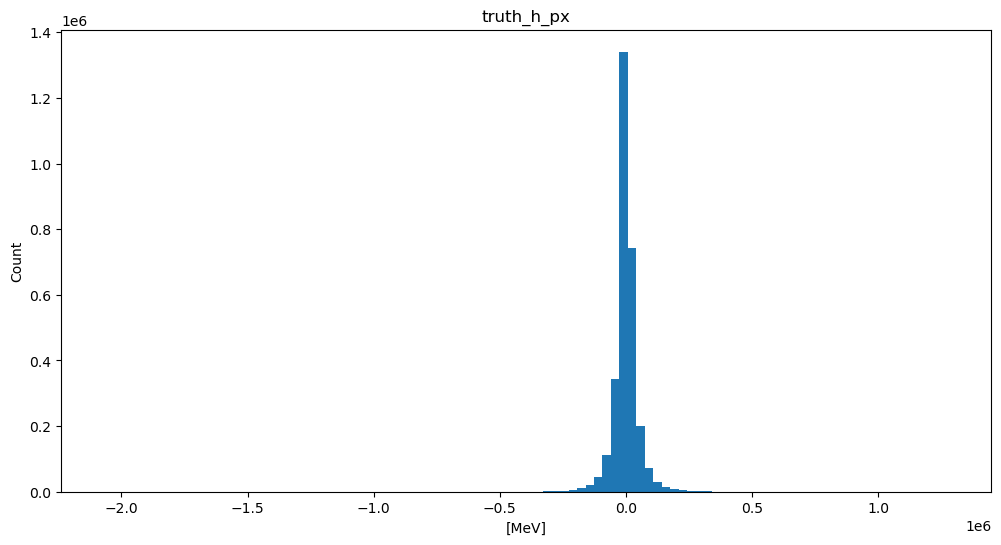

In [13]:
# truth w

truth_w_neg     = truth_w1_id[valid_ind]
truth_w_neg_pt  = truth_w1_pt[valid_ind]
truth_w_neg_eta = truth_w1_eta[valid_ind]
truth_w_neg_phi = truth_w1_phi[valid_ind]
truth_w_neg_m   = truth_w1_m[valid_ind]
# test_plot(truth_w_neg_m, 'truth_w_neg_m')

truth_w_pos     = truth_w2_id[valid_ind]
truth_w_pos_pt  = truth_w2_pt[valid_ind]
truth_w_pos_eta = truth_w2_eta[valid_ind]
truth_w_pos_phi = truth_w2_phi[valid_ind]
truth_w_pos_m   = truth_w2_m[valid_ind]
# test_plot(truth_w_pos_m, 'truth_w_pos_m')

truth_w_neg_px = px(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_py = py(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_pz = pz(truth_w_neg_pt, truth_w_neg_eta)
truth_w_neg_e  = energy(truth_w_neg_pt, truth_w_neg_eta, truth_w_neg_m)
truth_w_pos_px = px(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_py = py(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_pz = pz(truth_w_pos_pt, truth_w_pos_eta)
truth_w_pos_e  = energy(truth_w_pos_pt, truth_w_pos_eta, truth_w_pos_m)
test_plot(truth_w_pos_e, "truth_w_pos_e")
test_plot(truth_w_pos_pz, "truth_w_pos_pz")

# truth h
truth_h_pt  = truth_higgs_pt[valid_ind]
truth_h_eta = truth_higgs_eta[valid_ind]
truth_h_phi = truth_higgs_phi[valid_ind]
truth_h_m   = truth_higgs_m[valid_ind]
# test_plot(truth_h_m, 'truth_h_m')

truth_h_px = px(truth_h_pt, truth_h_phi)
truth_h_py = py(truth_h_pt, truth_h_phi)
truth_h_pz = pz(truth_h_pt, truth_h_eta)
truth_h_e  = energy(truth_h_pt, truth_h_eta, truth_h_m)
test_plot(truth_h_pz, "truth_h_pz")
test_plot(truth_h_px, "truth_h_px")

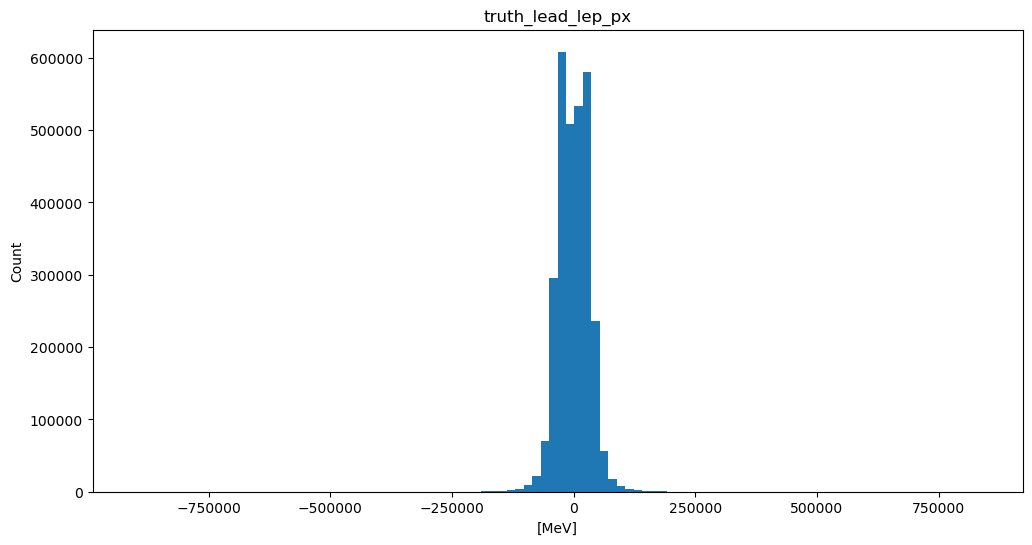

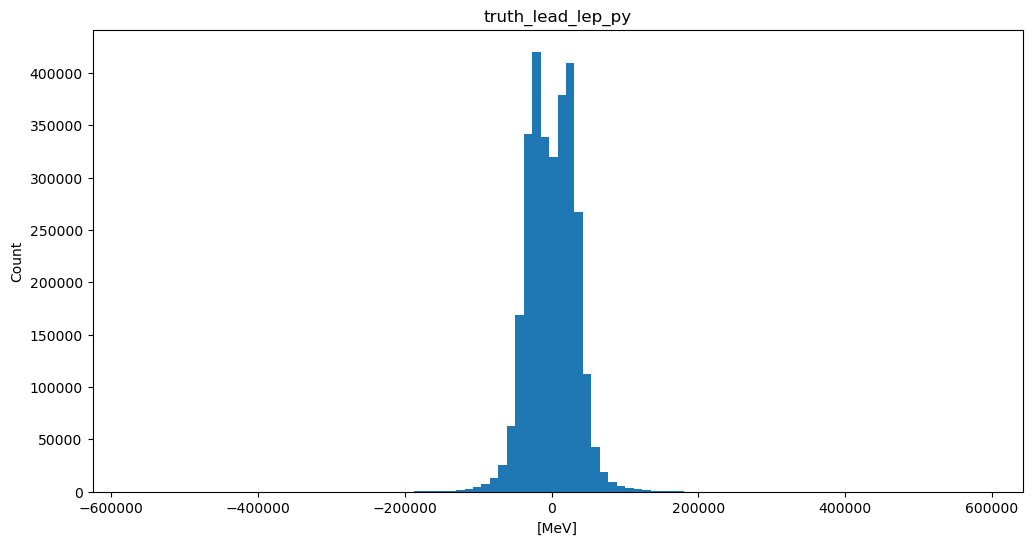

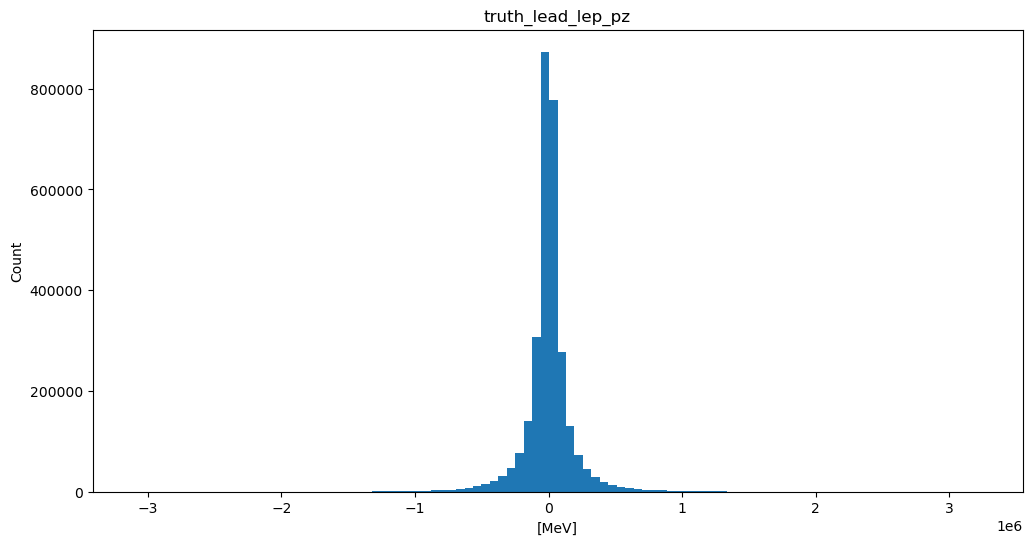

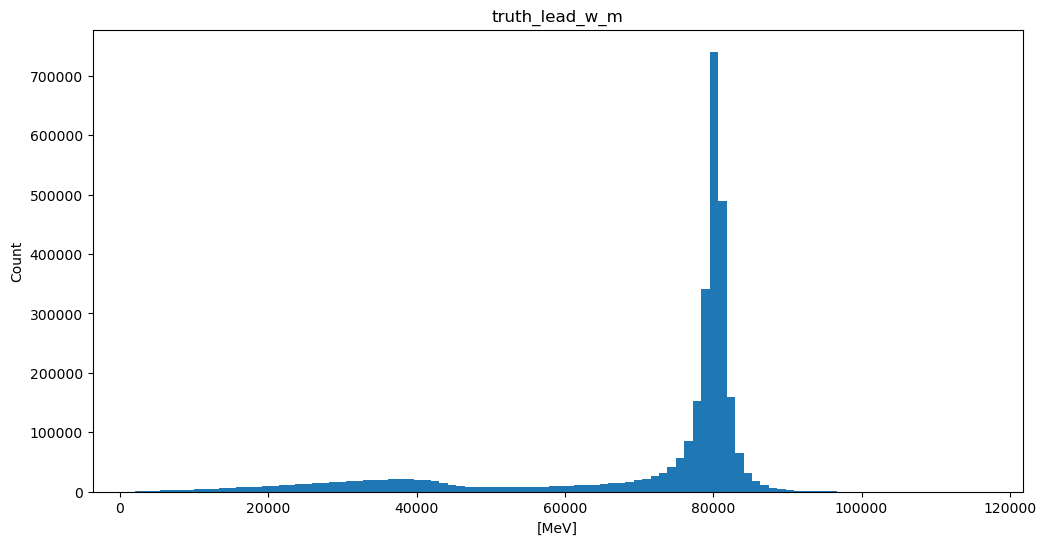

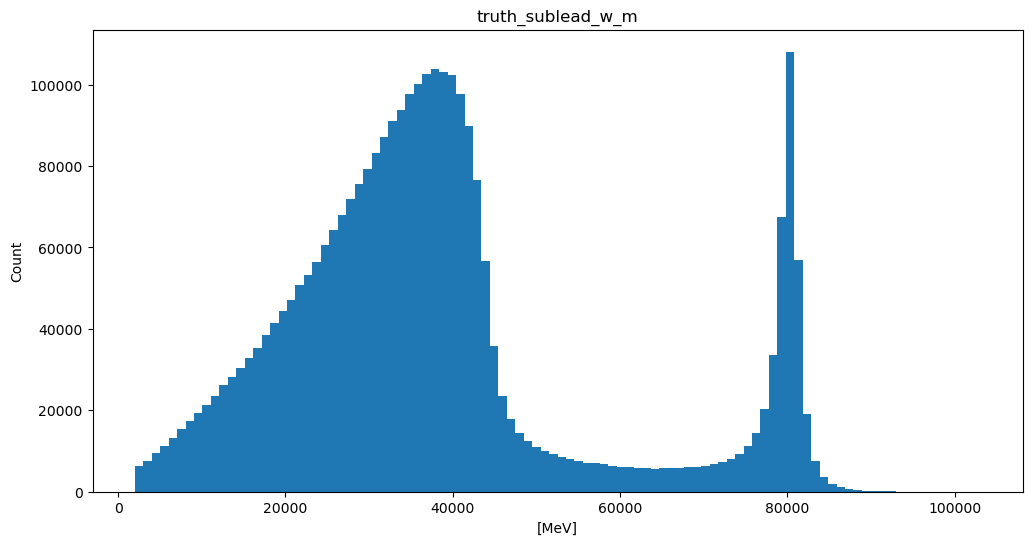

In [14]:
# (sub)lead identification (truth)

neg_leading_mask = truth_lep_neg_pt >= truth_lep_pos_pt

truth_lead_lep_px = np.where(neg_leading_mask, truth_lep_neg_px, truth_lep_pos_px)
truth_lead_lep_py = np.where(neg_leading_mask, truth_lep_neg_py, truth_lep_pos_py)
truth_lead_lep_pz = np.where(neg_leading_mask, truth_lep_neg_pz, truth_lep_pos_pz)
truth_lead_lep_e  = np.where(neg_leading_mask, truth_lep_neg_e, truth_lep_pos_e)
truth_lead_lep_pdgId = np.where(neg_leading_mask, truth_lnu12_id[valid_ind], truth_lnu21_id[valid_ind])
test_plot(truth_lead_lep_px, "truth_lead_lep_px")
test_plot(truth_lead_lep_py, "truth_lead_lep_py")
test_plot(truth_lead_lep_pz, "truth_lead_lep_pz")

truth_sublead_lep_px = np.where(neg_leading_mask, truth_lep_pos_px, truth_lep_neg_px)
truth_sublead_lep_py = np.where(neg_leading_mask, truth_lep_pos_py, truth_lep_neg_py)
truth_sublead_lep_pz = np.where(neg_leading_mask, truth_lep_pos_pz, truth_lep_neg_pz)
truth_sublead_lep_e  = np.where(neg_leading_mask, truth_lep_pos_e, truth_lep_neg_e)
truth_sublead_lep_pdgId = np.where(neg_leading_mask, truth_lnu21_id[valid_ind], truth_lnu12_id[valid_ind])

truth_lead_nu_px = np.where(neg_leading_mask, truth_nu_neg_px, truth_nu_pos_px)
truth_lead_nu_py = np.where(neg_leading_mask, truth_nu_neg_py, truth_nu_pos_py)
truth_lead_nu_pz = np.where(neg_leading_mask, truth_nu_neg_pz, truth_nu_pos_pz)
truth_lead_nu_e  = np.where(neg_leading_mask, truth_nu_neg_e, truth_nu_pos_e)
truth_lead_nu_pdgId = np.where(neg_leading_mask, truth_lnu22_id[valid_ind], truth_lnu11_id[valid_ind])

truth_sublead_nu_px = np.where(neg_leading_mask, truth_nu_pos_px, truth_nu_neg_px)
truth_sublead_nu_py = np.where(neg_leading_mask, truth_nu_pos_py, truth_nu_neg_py)
truth_sublead_nu_pz = np.where(neg_leading_mask, truth_nu_pos_pz, truth_nu_neg_pz)
truth_sublead_nu_e  = np.where(neg_leading_mask, truth_nu_pos_e, truth_nu_neg_e)
truth_sublead_nu_pdgId = np.where(neg_leading_mask, truth_lnu11_id[valid_ind], truth_lnu22_id[valid_ind])

truth_lead_w_px = np.where(neg_leading_mask, truth_w_neg_px, truth_w_pos_px)
truth_lead_w_py = np.where(neg_leading_mask, truth_w_neg_py, truth_w_pos_py)
truth_lead_w_pz = np.where(neg_leading_mask, truth_w_neg_pz, truth_w_pos_pz)
truth_lead_w_e  = np.where(neg_leading_mask, truth_w_neg_e, truth_w_pos_e)
truth_lead_w_m  = np.where(neg_leading_mask, truth_w_neg_m, truth_w_pos_m)
truth_lead_w_pdgId = np.where(neg_leading_mask, truth_w_neg, truth_w_pos)

truth_sublead_w_px = np.where(neg_leading_mask, truth_w_pos_px, truth_w_neg_px)
truth_sublead_w_py = np.where(neg_leading_mask, truth_w_pos_py, truth_w_neg_py)
truth_sublead_w_pz = np.where(neg_leading_mask, truth_w_pos_pz, truth_w_neg_pz)
truth_sublead_w_e  = np.where(neg_leading_mask, truth_w_pos_e, truth_w_neg_e)
truth_sublead_w_m  = np.where(neg_leading_mask, truth_w_pos_m, truth_w_neg_m)
truth_sublead_w_pdgId = np.where(neg_leading_mask, truth_w_pos, truth_w_neg)
test_plot(truth_lead_w_m, "truth_lead_w_m")
test_plot(truth_sublead_w_m, "truth_sublead_w_m")

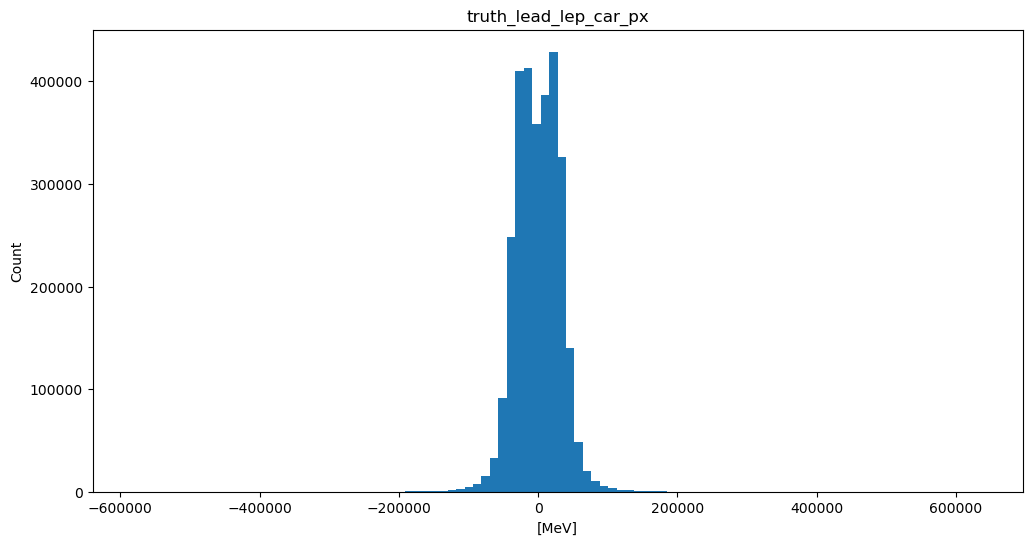

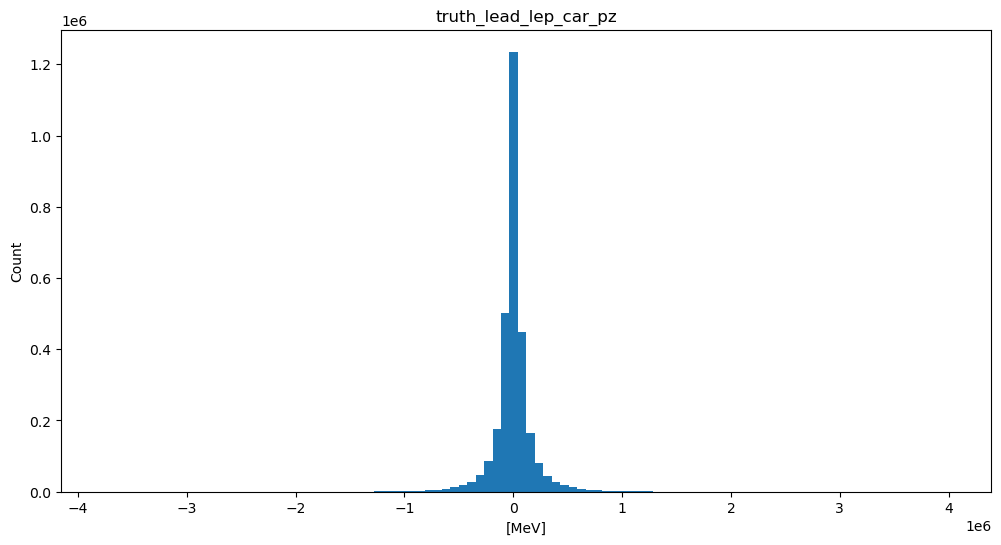

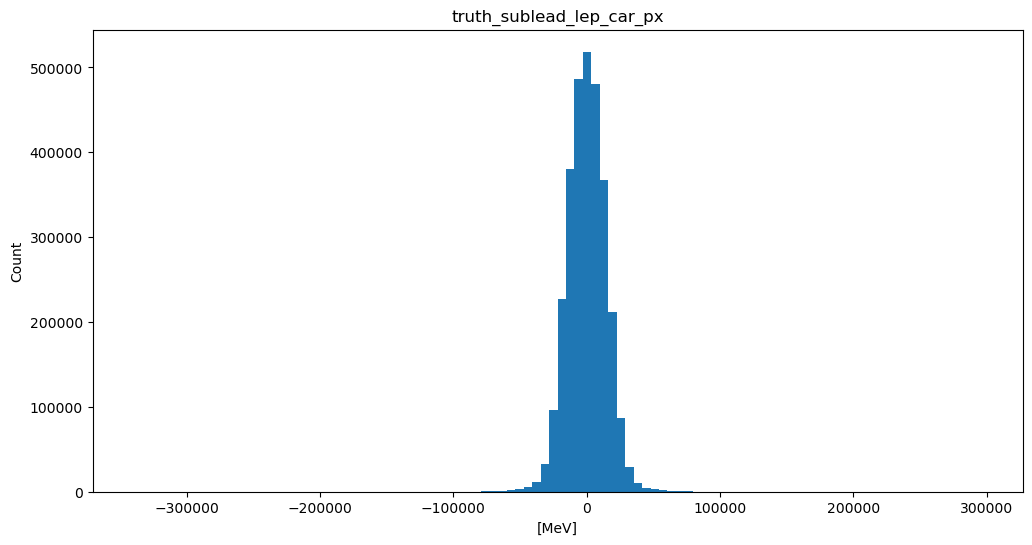

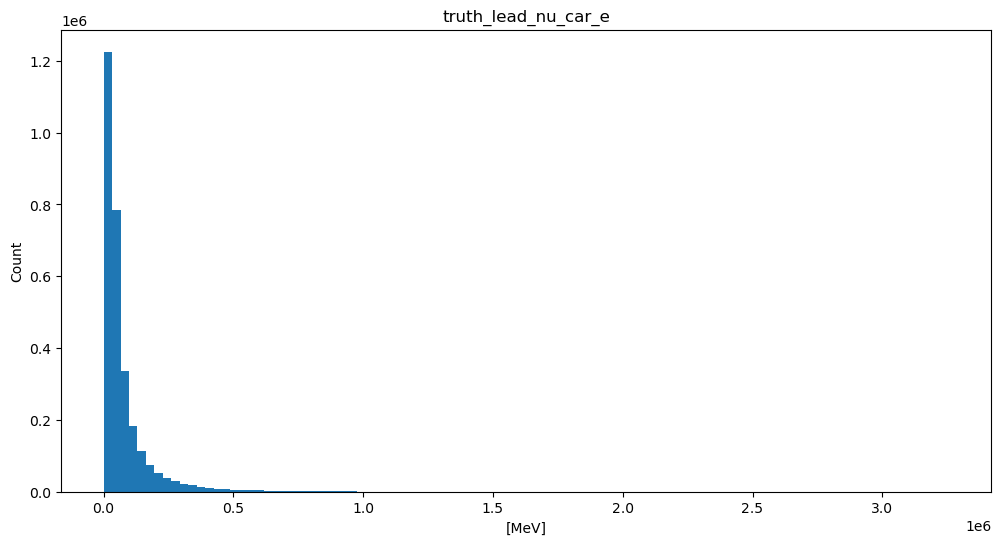

In [15]:
# (sub)lead identification (truth_CAR)

neg_leading_car_mask = truth_lep_neg_car_pt >= truth_lep_pos_car_pt

truth_lead_lep_car_px = np.where(neg_leading_car_mask, truth_lep_neg_car_px, truth_lep_pos_car_px)
truth_lead_lep_car_py = np.where(neg_leading_car_mask, truth_lep_neg_car_py, truth_lep_pos_car_py)
truth_lead_lep_car_pz = np.where(neg_leading_car_mask, truth_lep_neg_car_pz, truth_lep_pos_car_pz)
truth_lead_lep_car_e  = np.where(neg_leading_car_mask, truth_lep_neg_car_e, truth_lep_pos_car_e)
truth_lead_lep_car_pdgId = np.where(neg_leading_car_mask, truth_lnu12_car_id[valid_ind], truth_lnu21_car_id[valid_ind])
test_plot(truth_lead_lep_car_px, "truth_lead_lep_car_px")
test_plot(truth_lead_lep_car_pz, "truth_lead_lep_car_pz")

truth_sublead_lep_car_px = np.where(neg_leading_car_mask, truth_lep_pos_car_px, truth_lep_neg_car_px)
truth_sublead_lep_car_py = np.where(neg_leading_car_mask, truth_lep_pos_car_py, truth_lep_neg_car_py)
truth_sublead_lep_car_pz = np.where(neg_leading_car_mask, truth_lep_pos_car_pz, truth_lep_neg_car_pz)
truth_sublead_lep_car_e  = np.where(neg_leading_car_mask, truth_lep_pos_car_e, truth_lep_neg_car_e)
truth_sublead_lep_car_pdgId = np.where(neg_leading_car_mask, truth_lnu21_car_id[valid_ind], truth_lnu12_car_id[valid_ind])
test_plot(truth_sublead_lep_car_px, "truth_sublead_lep_car_px")

truth_lead_nu_car_px = np.where(neg_leading_car_mask, truth_nu_neg_car_px, truth_nu_pos_car_px)
truth_lead_nu_car_py = np.where(neg_leading_car_mask, truth_nu_neg_car_py, truth_nu_pos_car_py)
truth_lead_nu_car_pz = np.where(neg_leading_car_mask, truth_nu_neg_car_pz, truth_nu_pos_car_pz)
truth_lead_nu_car_e  = np.where(neg_leading_car_mask, truth_nu_neg_car_e, truth_nu_pos_car_e)
truth_lead_nu_car_pdgId = np.where(neg_leading_car_mask, truth_lnu22_car_id[valid_ind], truth_lnu11_car_id[valid_ind])

truth_sublead_nu_car_px = np.where(neg_leading_car_mask, truth_nu_pos_car_px, truth_nu_neg_car_px)
truth_sublead_nu_car_py = np.where(neg_leading_car_mask, truth_nu_pos_car_py, truth_nu_neg_car_py)
truth_sublead_nu_car_pz = np.where(neg_leading_car_mask, truth_nu_pos_car_pz, truth_nu_neg_car_pz)
truth_sublead_nu_car_e  = np.where(neg_leading_car_mask, truth_nu_pos_car_e, truth_nu_neg_car_e)
truth_sublead_nu_car_pdgId = np.where(neg_leading_car_mask, truth_lnu11_car_id[valid_ind], truth_lnu22_car_id[valid_ind])
test_plot(truth_lead_nu_car_e, "truth_lead_nu_car_e")

In [16]:
# create dataclass for truth sample

@dataclass
class Truth_lead_lep:
    px = truth_lead_lep_px * GEV
    py = truth_lead_lep_py * GEV
    pz = truth_lead_lep_pz * GEV
    energy = truth_lead_lep_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_lead_lep_pdgId


@dataclass
class Truth_sublead_lep:
    px = truth_sublead_lep_px * GEV
    py = truth_sublead_lep_py * GEV
    pz = truth_sublead_lep_pz * GEV
    energy = truth_sublead_lep_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_sublead_lep_pdgId


@dataclass
class Truth_dilep:
    p4 = Truth_lead_lep.p4 + Truth_sublead_lep.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    dphi = dphi_pi(
        phi(Truth_lead_lep.px, Truth_lead_lep.py),
        phi(Truth_sublead_lep.px, Truth_sublead_lep.py)
    )
    deta = deta(
        eta(Truth_lead_lep.px, Truth_lead_lep.py, Truth_lead_lep.pz),
        eta(Truth_sublead_lep.px, Truth_sublead_lep.py, Truth_sublead_lep.pz)
    )
    m = m(p4)


@dataclass
class Truth_lead_nu:
    px = truth_lead_nu_px * GEV
    py = truth_lead_nu_py * GEV
    pz = truth_lead_nu_pz * GEV
    energy = truth_lead_nu_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_lead_nu_pdgId


@dataclass
class Truth_sublead_nu:
    px = truth_sublead_nu_px * GEV
    py = truth_sublead_nu_py * GEV
    pz = truth_sublead_nu_pz * GEV
    energy = truth_sublead_nu_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_sublead_nu_pdgId


@dataclass
class Truth_lead_lep_CAR:
    px = truth_lead_lep_car_px * GEV
    py = truth_lead_lep_car_py * GEV
    pz = truth_lead_lep_car_pz * GEV
    energy = truth_lead_lep_car_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_lead_lep_car_pdgId


@dataclass
class Truth_sublead_lep_CAR:
    px = truth_sublead_lep_car_px * GEV
    py = truth_sublead_lep_car_py * GEV
    pz = truth_sublead_lep_car_pz * GEV
    energy = truth_sublead_lep_car_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_dilep_CAR:
    p4 = Truth_lead_lep_CAR.p4 + Truth_sublead_lep_CAR.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    deta = deta(
        eta(Truth_lead_lep_CAR.px, Truth_lead_lep_CAR.py, Truth_lead_lep_CAR.pz),
        eta(Truth_sublead_lep_CAR.px, Truth_sublead_lep_CAR.py, Truth_sublead_lep_CAR.pz)
    )
    dphi = dphi_pi(
        phi(Truth_lead_lep_CAR.px, Truth_lead_lep_CAR.py),
        phi(Truth_sublead_lep_CAR.px, Truth_sublead_lep_CAR.py)
    )
    m = m(p4)


@dataclass
class Truth_lead_nu_CAR:
    px = truth_lead_nu_car_px * GEV
    py = truth_lead_nu_car_py * GEV
    pz = truth_lead_nu_car_pz * GEV
    energy = truth_lead_nu_car_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_lead_nu_car_pdgId


@dataclass
class Truth_sublead_nu_CAR:
    px = truth_sublead_nu_car_px * GEV
    py = truth_sublead_nu_car_py * GEV
    pz = truth_sublead_nu_car_pz * GEV
    energy = truth_sublead_nu_car_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_sublead_nu_car_pdgId


@dataclass
class Lead_w:
    px = truth_lead_w_px * GEV
    py = truth_lead_w_py * GEV
    pz = truth_lead_w_pz * GEV
    energy = truth_lead_w_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = truth_lead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_lead_w_pdgId


@dataclass
class Sublead_w:
    px = truth_sublead_w_px * GEV
    py = truth_sublead_w_py * GEV
    pz = truth_sublead_w_pz * GEV
    energy = truth_sublead_w_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m   = truth_sublead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    pdgId = truth_sublead_w_pdgId
    

@dataclass
class Higgs:
    px = truth_h_px * GEV
    py = truth_h_py * GEV
    pz = truth_h_pz * GEV
    energy = truth_h_e * GEV
    pt  = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m   = truth_h_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


# debug (need to pass)
if __name__ == "__main__":
    print(Truth_lead_lep)
    print(Truth_sublead_lep)
    print(Truth_dilep)
    print(Truth_lead_nu)
    print(Truth_sublead_nu)
    print(Lead_w)
    print(Sublead_w)
    print(Higgs)

/tmp/ipykernel_646419/2934730845.py:36: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(


<class '__main__.Truth_lead_lep'>
<class '__main__.Truth_sublead_lep'>
<class '__main__.Truth_dilep'>
<class '__main__.Truth_lead_nu'>
<class '__main__.Truth_sublead_nu'>
<class '__main__.Lead_w'>
<class '__main__.Sublead_w'>
<class '__main__.Higgs'>


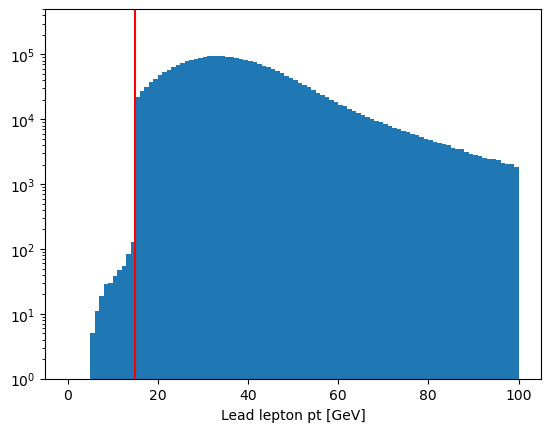

2.6344006


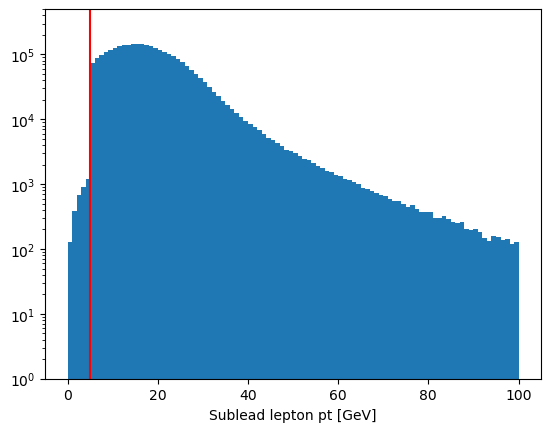

0.10892227


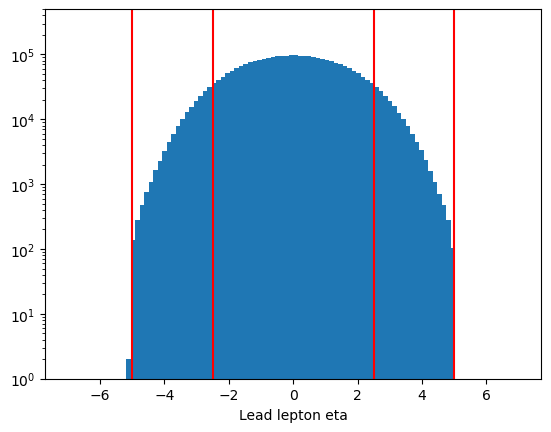

-5.1976433


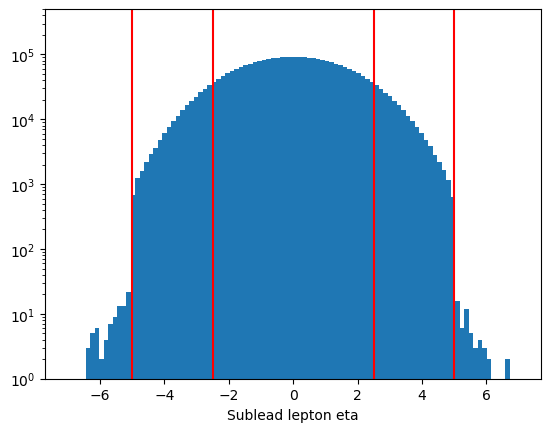

-6.9070086


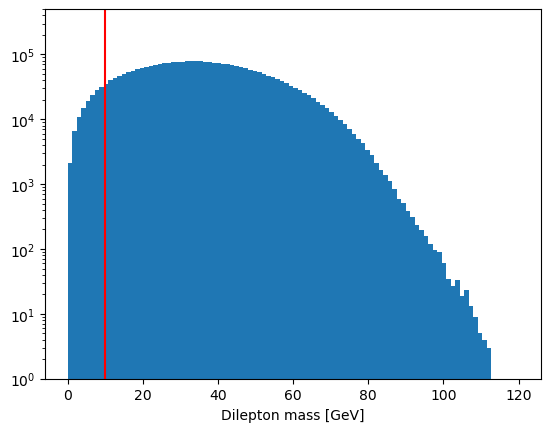

-6.9070086


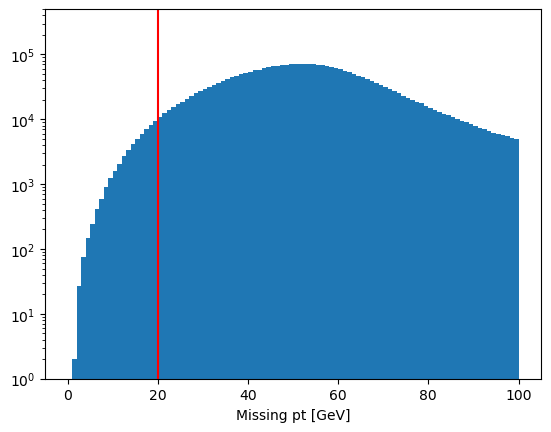

1.7796066


In [17]:
# truth check (mix)

plt.hist(Truth_lead_lep.pt, bins=np.linspace(0,100,101))
plt.vlines(15, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Lead lepton pt [GeV]")
plt.show()
print(Truth_lead_lep.pt.min())

plt.hist(Truth_sublead_lep.pt, bins=np.linspace(0,100,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Sublead lepton pt [GeV]")
plt.show()
print(Truth_sublead_lep.pt.min())

plt.hist(Truth_lead_lep.eta, bins=np.linspace(-7,7,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.vlines(2.5, 0, 1e10, colors='r')
plt.vlines(-2.5, 0, 1e10, colors='r')
plt.vlines(-5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Lead lepton eta")
plt.show()
print(Truth_lead_lep.eta.min())

plt.hist(Truth_sublead_lep.eta, bins=np.linspace(-7,7,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.vlines(2.5, 0, 1e10, colors='r')
plt.vlines(-2.5, 0, 1e10, colors='r')
plt.vlines(-5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Sublead lepton eta")
plt.show()
print(Truth_sublead_lep.eta.min())

plt.hist(Truth_dilep.m, bins=np.linspace(0,120,101))
plt.vlines(10, 0, 1e10, colors='r')
# plt.vlines(-2.5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Dilepton mass [GeV]")
plt.show()
print(Truth_sublead_lep.eta.min())

miss_pt = Truth_lead_nu.pt + Truth_sublead_nu.pt
plt.hist(miss_pt, bins=np.linspace(0, 100, 101))
plt.vlines(20, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Missing pt [GeV]")
plt.show()
print(miss_pt.min())

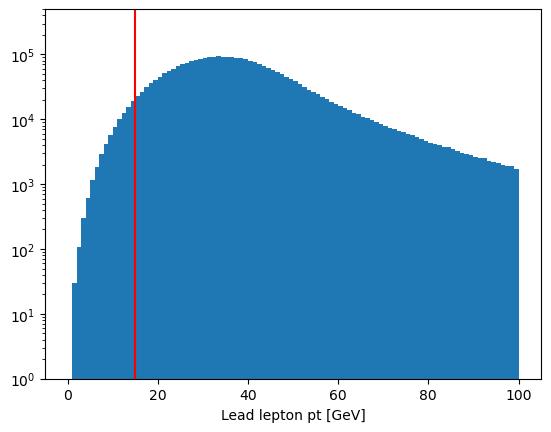

0.8356871


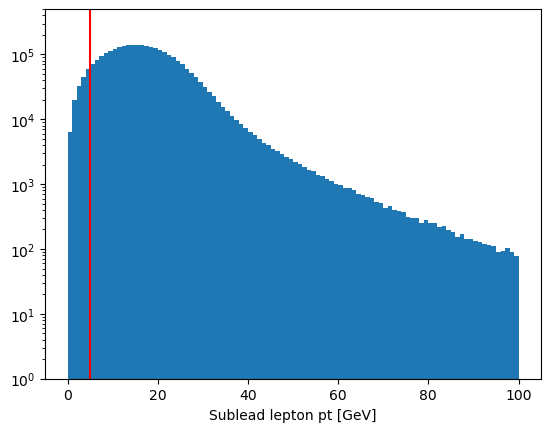

0.013572426


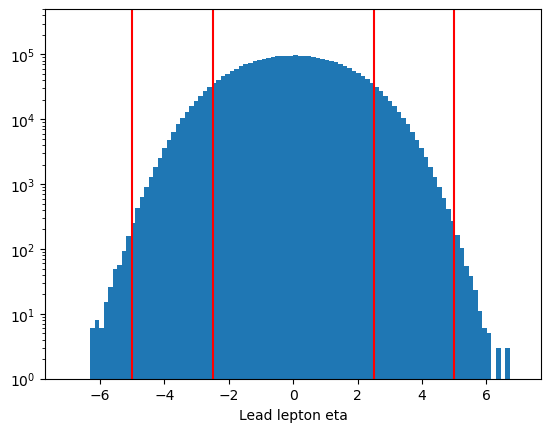

-6.2475066


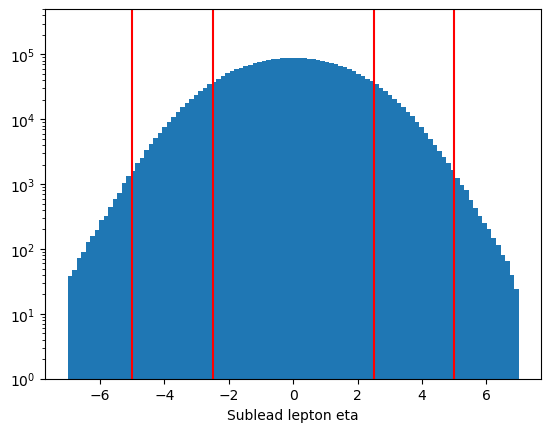

-9.691063


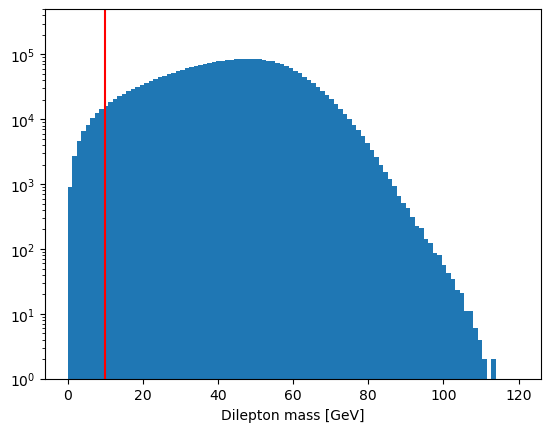

-9.691063


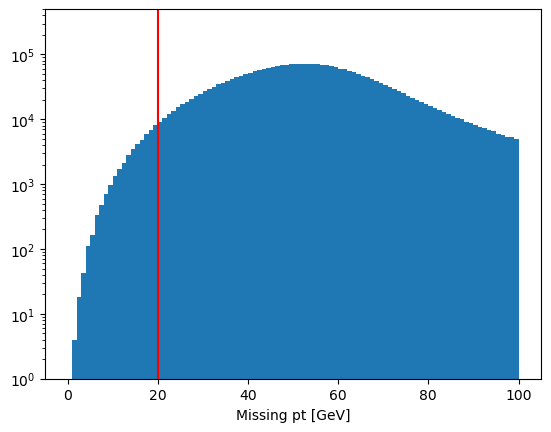

1.1503782


In [18]:
# truth check (CAR)

plt.hist(Truth_lead_lep_CAR.pt, bins=np.linspace(0,100,101))
plt.vlines(15, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Lead lepton pt [GeV]")
plt.show()
print(Truth_lead_lep_CAR.pt.min())

plt.hist(Truth_sublead_lep_CAR.pt, bins=np.linspace(0,100,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Sublead lepton pt [GeV]")
plt.show()
print(Truth_sublead_lep_CAR.pt.min())

plt.hist(Truth_lead_lep_CAR.eta, bins=np.linspace(-7,7,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.vlines(2.5, 0, 1e10, colors='r')
plt.vlines(-2.5, 0, 1e10, colors='r')
plt.vlines(-5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Lead lepton eta")
plt.show()
print(Truth_lead_lep_CAR.eta.min())

plt.hist(Truth_sublead_lep_CAR.eta, bins=np.linspace(-7,7,101))
plt.vlines(5, 0, 1e10, colors='r')
plt.vlines(2.5, 0, 1e10, colors='r')
plt.vlines(-2.5, 0, 1e10, colors='r')
plt.vlines(-5, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Sublead lepton eta")
plt.show()
print(Truth_sublead_lep_CAR.eta.min())

plt.hist(Truth_dilep_CAR.m, bins=np.linspace(0,120,101))
# plt.vlines(2.5, 0, 1e10, colors='r')
plt.vlines(10, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Dilepton mass [GeV]")
plt.show()
print(Truth_sublead_lep_CAR.eta.min())

miss_pt = Truth_lead_nu_CAR.pt + Truth_sublead_nu_CAR.pt
plt.hist(miss_pt, bins=np.linspace(0, 100, 101))
plt.vlines(20, 0, 1e10, colors='r')
plt.semilogy()
plt.ylim(1, 5e5)
plt.xlabel("Missing pt [GeV]")
plt.show()
print(miss_pt.min())

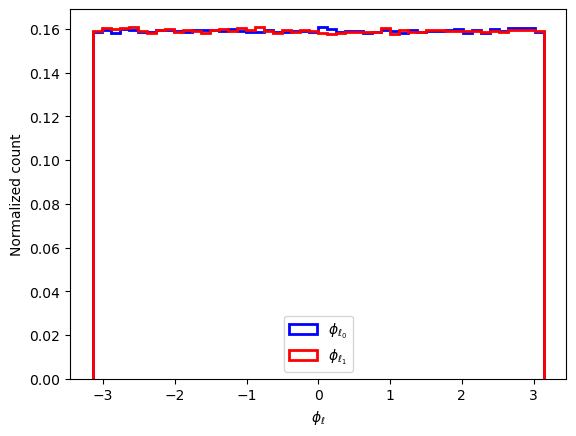

In [19]:
fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(-np.pi, np.pi, 51)
plt.hist(
    Truth_lead_lep().phi,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label=r"$\phi_{\ell_0}$",
    density=True,
)
plt.hist(
    Truth_sublead_lep().phi,
	bins=bins_edge,
	histtype="step",
	color="red",
	linewidth=2,
	label=r"$\phi_{\ell_1}$",
	density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$\phi_{\ell}$")
plt.ylabel("Normalized count")
plt.show()

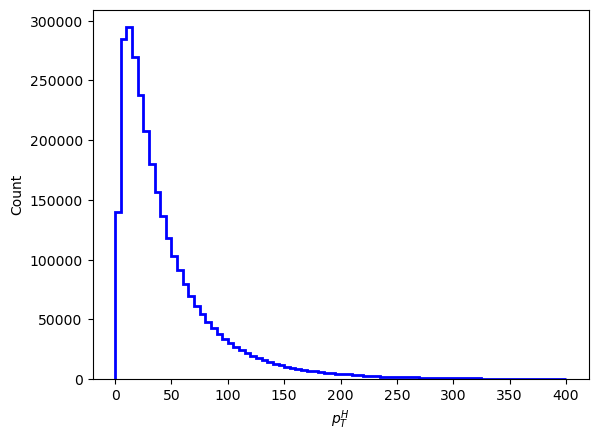

In [20]:
fig = plt.Figure(figsize=(12, 6), dpi=200)
bins_edge = np.linspace(0, 400, 81)
plt.hist(
    Higgs.pt,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    density=False,
)
plt.xlabel(r"$p_T^H$")
plt.ylabel("Count")
plt.show()

higgs_20_mask = Higgs.pt < 20

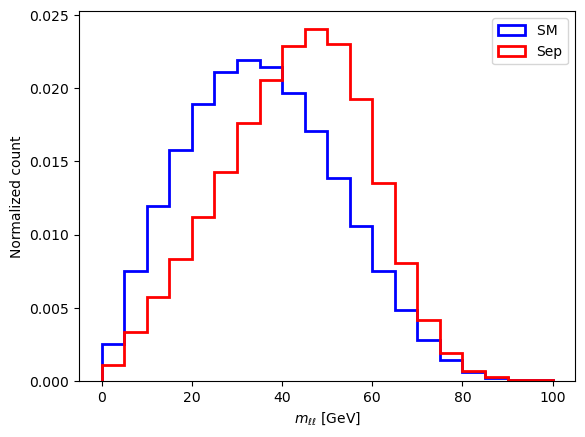

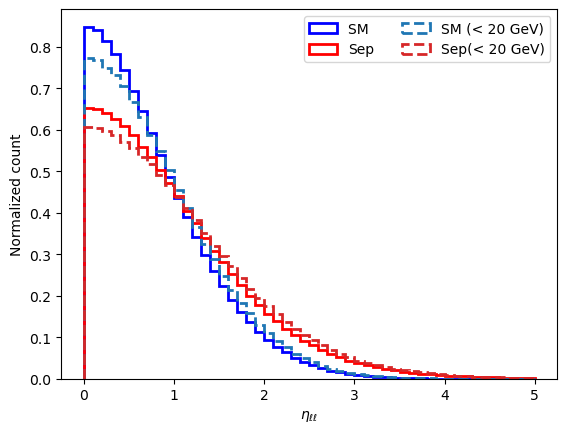

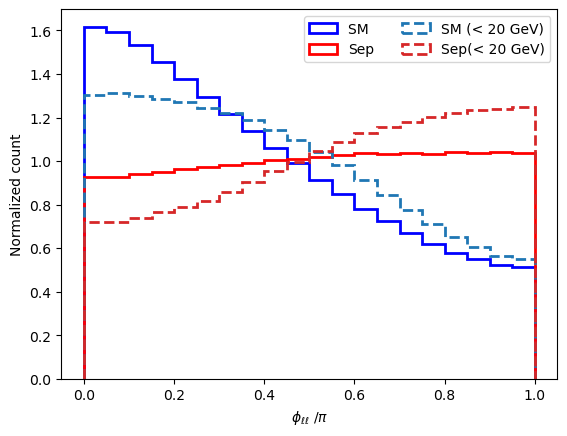

In [21]:
fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 100, 21)
plt.hist(
    Truth_dilep().m,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM ",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().m,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="Sep",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$m_{\ell \ell}$ [GeV]")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 5, 51)
plt.hist(
    Truth_dilep().deta,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM ",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().deta,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="Sep",
    density=True,
)
plt.hist(
    Truth_dilep().deta[higgs_20_mask],
    bins=bins_edge,
    histtype="step",
    linestyle="--",
    color="tab:blue",
    linewidth=2,
    label="SM (< 20 GeV)",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().deta[higgs_20_mask],
    bins=bins_edge,
    histtype="step",
    linestyle="--",
    color="tab:red",
    linewidth=2,
    label="Sep(< 20 GeV)",
    density=True,
)
plt.legend(loc="best", ncol=2)
plt.xlabel(r"$\eta_{\ell \ell}$")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 1, 21)
plt.hist(
    Truth_dilep().dphi,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM ",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().dphi,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="Sep",
    density=True,
)
plt.hist(
    Truth_dilep().dphi[higgs_20_mask],
    bins=bins_edge,
    histtype="step",
    linestyle="--",
    color="tab:blue",
    linewidth=2,
    label="SM (< 20 GeV)",
    density=True,
)
plt.hist(
    Truth_dilep_CAR().dphi[higgs_20_mask],
    bins=bins_edge,
    histtype="step",
    linestyle="--",
    color="tab:red",
    linewidth=2,
    label="Sep(< 20 GeV)",
    density=True,
)
plt.legend(loc="best", ncol=2)
plt.xlabel(r"$\phi_{\ell \ell}\ / \pi$")
plt.ylabel("Normalized count")
plt.show()

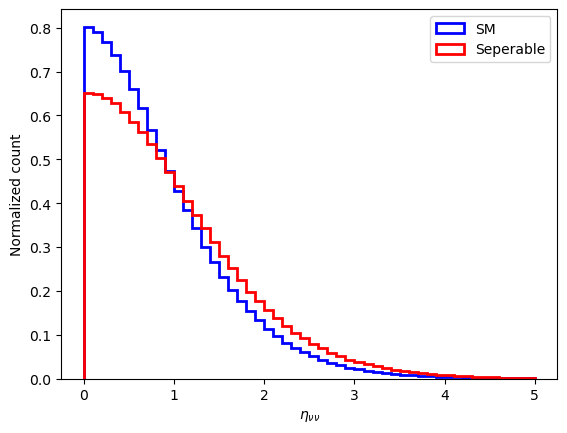

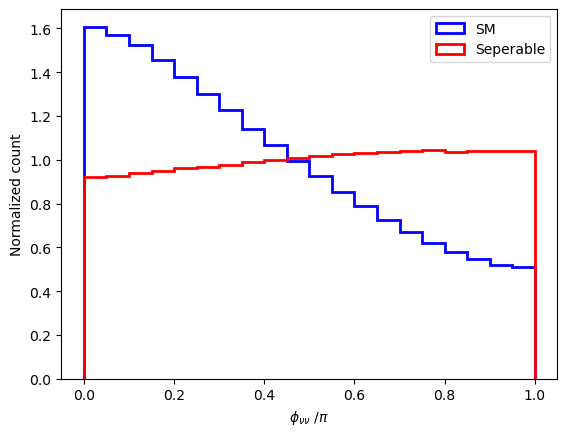

In [22]:
# by charge instead of by lead/sublead

detall_charge = deta(truth_nu_pos_eta, truth_nu_neg_eta)
dphi_charge = dphi_pi(truth_nu_pos_phi, truth_nu_neg_phi)
detall_charge_car = deta(truth_nu_pos_car_eta, truth_nu_neg_car_eta)
dphi_charge_car = dphi_pi(truth_nu_pos_car_phi, truth_nu_neg_car_phi)


fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 5, 51)
plt.hist(
    detall_charge,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    detall_charge_car,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="Seperable",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$\eta_{\nu\nu}$")
plt.ylabel("Normalized count")
plt.show()

fig = plt.Figure(figsize=(12, 6), dpi=120)
bins_edge = np.linspace(0, 1, 21)
plt.hist(
    dphi_charge,
    bins=bins_edge,
    histtype="step",
    color="blue",
    linewidth=2,
    label="SM",
    density=True,
)
plt.hist(
    dphi_charge_car,
    bins=bins_edge,
    histtype="step",
    color="red",
    linewidth=2,
    label="Seperable",
    density=True,
)
plt.legend(loc="best")
plt.xlabel(r"$\phi_{\nu\nu}\ / \pi$")
plt.ylabel("Normalized count")
plt.show()

In [23]:
def save_dataclasses_to_h5(filename, **dataclasses_dict):
    """
    Save dataclasses to an HDF5 file
    
    :param filename          : path to the output HDF5 file
    :param **dataclasses_dict: keyword arguments with names and dataclass instances
    """
    with h5py.File(filename, 'w') as f:
        # for each dataclass
        for group_name, dataclass_instance in dataclasses_dict.items():
            # create a group for this dataclass
            group = f.create_group(group_name)
            
            # get all attributes that aren't special methods
            for attr_name in dir(dataclass_instance):
                if not attr_name.startswith('_'):  # skip private attributes
                    try:
                        attr_value = getattr(dataclass_instance, attr_name)
                        
                        # handle numpy arrays
                        if isinstance(attr_value, np.ndarray):
                            group.create_dataset(attr_name, data=attr_value, compression="gzip")
                        # handle scalars
                        elif np.isscalar(attr_value):
                            group.attrs[attr_name] = attr_value
                    except Exception as e:
                        print(f"Error saving {group_name}.{attr_name}: {e}")
    
def save_particles_to_h5(filename=stored_data_path):
	"""Save all particle dataclasses to H5 file"""
	save_dataclasses_to_h5(
		filename,
		truth_lead_lep=Truth_lead_lep,
		truth_sublead_lep=Truth_sublead_lep,
		truth_dilep=Truth_dilep,
		truth_lead_nu=Truth_lead_nu,
		truth_sublead_nu=Truth_sublead_nu,
		truth_lead_lep_car=Truth_lead_lep_CAR,
		truth_sublead_lep_car=Truth_sublead_lep_CAR,
		truth_dilep_car=Truth_dilep_CAR,
		truth_lead_nu_car=Truth_lead_nu_CAR,
		truth_sublead_nu_car=Truth_sublead_nu_CAR,
		lead_w=Lead_w,
		sublead_w=Sublead_w,
		higgs=Higgs
	)
	print(f"Successfully saved particle data to {filename}")

# Call the function to save the data
save_particles_to_h5()

Successfully saved particle data to ./mc20_truth.h5


In [24]:
def load_particles_from_h5(filename=stored_data_path):
    """
    Load particle data from an HDF5 file
    
    :param filename: Path to the HDF5 file
        
    returns: fictionary with the loaded data
    """
    result = {}
    
    with h5py.File(filename, 'r') as f:
        # for each group in the file
        for group_name in f.keys():
            group_data = {}
            
            # load datasets (numpy arrays)
            for dataset_name in f[group_name].keys():
                group_data[dataset_name] = f[group_name][dataset_name][:]
            
            # load attributes (scalars)
            for attr_name, attr_value in f[group_name].attrs.items():
                group_data[attr_name] = attr_value
            
            result[group_name] = group_data
            
    return result

In [25]:
# check if the data is saved correctly
load_particles_from_h5().keys()

dict_keys(['higgs', 'lead_w', 'sublead_w', 'truth_dilep', 'truth_dilep_car', 'truth_lead_lep', 'truth_lead_lep_car', 'truth_lead_nu', 'truth_lead_nu_car', 'truth_sublead_lep', 'truth_sublead_lep_car', 'truth_sublead_nu', 'truth_sublead_nu_car'])